In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter

##### Hepatitis C virus (HCV) is a small, single-stranded RNA virus that primarily infects the liver and is a major cause of chronic viral hepatitis.

HCV is transmitted primarily through exposure to infected blood, which can occur through various means, including:

1.Sharing of needles and syringes among drug users

2.Receiving contaminated blood transfusions or organ transplants (though this is now rare due to improved screening           measures)

3.Using contaminated medical equipment, such as needles and syringes, in healthcare settings

4.From mother to child during childbirth, although this is relatively uncommon

5.Less commonly, through sexual contact with an infected person

##### This data is observed from Egyptian Patients for who underwent treatment dosages for HCV about 18 months

In [2]:
# Load DataSet

df = pd.read_csv("HCV-Egy-Data.csv")

In [3]:
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [4]:
df.shape

(1385, 29)

##### There are 1385 records, each one with 29 features

In [5]:
df.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [6]:
#Remove spaces at the ends of column names to avoid any further errors:
df.columns = df.columns.str.strip()

#Renaming columns
column_name_mapping = {'Nausea/Vomting': 'Nausea', 'Fatigue & generalized bone ache':'Fatigue',
                       'Epigastric pain':'Epigastric', 'Baseline histological Grading': 'Grading',
                       'Baselinehistological staging':'Staging','AST 1': 'AST1', 'ALT 1':'ALT1',
                       'ALT 12': 'ALT12','ALT 24': 'ALT24', 'ALT 36': 'ALT36', 'ALT 48':'ALT48', 'ALT after 24 w':'ALTw24',
                       'RNA Base': 'RNA_base', 'RNA 4':'RNA4', 'RNA 12':'RNA12', 'RNA EOT':'RNA_eot',
                       'RNA EF': 'RNA_ef'}
df.rename(columns=column_name_mapping, inplace=True)

In [7]:
#Remove spaces at the ends of column names to avoid any further errors:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea', 'Headache', 'Diarrhea',
       'Fatigue', 'Jaundice', 'Epigastric', 'WBC', 'RBC', 'HGB', 'Plat',
       'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24', 'ALT36', 'ALT48', 'ALTw24',
       'RNA_base', 'RNA4', 'RNA12', 'RNA_eot', 'RNA_ef', 'Grading', 'Staging'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         1385 non-null   int64
 1   Gender      1385 non-null   int64
 2   BMI         1385 non-null   int64
 3   Fever       1385 non-null   int64
 4   Nausea      1385 non-null   int64
 5   Headache    1385 non-null   int64
 6   Diarrhea    1385 non-null   int64
 7   Fatigue     1385 non-null   int64
 8   Jaundice    1385 non-null   int64
 9   Epigastric  1385 non-null   int64
 10  WBC         1385 non-null   int64
 11  RBC         1385 non-null   int64
 12  HGB         1385 non-null   int64
 13  Plat        1385 non-null   int64
 14  AST1        1385 non-null   int64
 15  ALT1        1385 non-null   int64
 16  ALT4        1385 non-null   int64
 17  ALT12       1385 non-null   int64
 18  ALT24       1385 non-null   int64
 19  ALT36       1385 non-null   int64
 20  ALT48       1385 non-null   in

In [10]:
df.isnull().sum().sum()

0

In [11]:
cat_cols = ['Gender', 'Fever', 'Nausea', 'Headache', 'Diarrhea', 'Fatigue', 'Jaundice', 'Epigastric' ]

for col in cat_cols:
  print(df[col].value_counts())

1    707
2    678
Name: Gender, dtype: int64
2    714
1    671
Name: Fever, dtype: int64
2    696
1    689
Name: Nausea, dtype: int64
1    698
2    687
Name: Headache, dtype: int64
2    696
1    689
Name: Diarrhea, dtype: int64
1    694
2    691
Name: Fatigue, dtype: int64
2    694
1    691
Name: Jaundice, dtype: int64
2    698
1    687
Name: Epigastric, dtype: int64


In [12]:
df[['WBC', 'RBC', 'HGB', 'Plat' ]]

,WBC,RBC,HGB,Plat
0,7425,4248807,14,112132
1,12101,4429425,10,129367
2,4178,4621191,12,151522
3,6490,4794631,10,146457
4,3661,4606375,11,187684
...,...,...,...,...
1380,7044,4957174,15,202520
1381,6207,4636951,10,115776
1382,4913,4122038,14,128354
1383,7257,4241990,10,205908


In [13]:
df[['AST1', 'ALT1','ALT4', 'ALT12', 'ALT24', 'ALT36', 'ALT48', 'ALTw24' ]]

,AST1,ALT1,ALT4,ALT12,ALT24,ALT36,ALT48,ALTw24
0,99,84,52,109,81,5,5,5
1,91,123,95,75,113,57,123,44
2,113,49,95,107,116,5,5,5
3,43,64,109,80,88,48,77,33
4,99,104,67,48,120,94,90,30
...,...,...,...,...,...,...,...,...
1380,122,59,78,106,127,63,44,45
1381,128,102,65,99,108,97,64,41
1382,61,93,123,61,116,87,39,24
1383,70,97,104,74,47,48,81,43


In [14]:
df[['RNA_base', 'RNA4', 'RNA12', 'RNA_eot', 'RNA_ef']]

,RNA_base,RNA4,RNA12,RNA_eot,RNA_ef
0,655330,634536,288194,5,5
1,40620,538635,637056,336804,31085
2,571148,661346,5,735945,558829
3,1041941,449939,585688,744463,582301
4,660410,738756,3731527,338946,242861
...,...,...,...,...,...
1380,387795,55938,5,5,5
1381,481378,152961,393339,73574,236273
1382,612664,572756,806109,343719,160457
1383,139872,76161,515730,2460,696074


In [15]:
df[['Grading', 'Staging']]

,Grading,Staging
0,13,2
1,4,2
2,4,4
3,10,3
4,11,1
...,...,...
1380,15,4
1381,10,2
1382,6,2
1383,15,3


In [16]:
df['Grading'].value_counts()

15    139
11    121
14    106
9     103
6     102
12    101
8      97
13     95
4      94
5      93
3      89
10     87
16     86
7      72
Name: Grading, dtype: int64

In [17]:
df['Staging'].value_counts()

4    362
3    355
1    336
2    332
Name: Staging, dtype: int64

In [18]:
intermediate = df['Staging'].replace({2:0, 1:0})
df['Binary_staging'] = intermediate.replace({3:1, 4:1})
df.value_counts()

Age  Gender  BMI  Fever  Nausea  Headache  Diarrhea  Fatigue  Jaundice  Epigastric  WBC    RBC      HGB  Plat    AST1  ALT1  ALT4  ALT12  ALT24  ALT36  ALT48  ALTw24  RNA_base  RNA4     RNA12   RNA_eot  RNA_ef  Grading  Staging  Binary_staging
32   1       22   1      2       2         2         1        1         1           3153   4152861  11   209054  69    92    42    101    107    78     112    30      521841    96063    5       5        5       6        1        0                 1
52   1       24   2      1       2         2         2        1         1           5905   4153369  10   208635  44    109   114   81     76     65     98     23      137086    628135   787605  598453   347435  15       3        1                 1
             28   2      2       1         2         1        2         2           11065  4002769  15   148857  128   128   100   71     51     66     120    26      262262    595314   207550  87531    607145  9        3        1                 1
         

In [19]:
df

,Age,Gender,BMI,Fever,Nausea,Headache,Diarrhea,Fatigue,Jaundice,Epigastric,...,ALT48,ALTw24,RNA_base,RNA4,RNA12,RNA_eot,RNA_ef,Grading,Staging,Binary_staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,655330,634536,288194,5,5,13,2,0
1,46,1,29,1,2,2,1,2,2,1,...,123,44,40620,538635,637056,336804,31085,4,2,0
2,57,1,33,2,2,2,2,1,1,1,...,5,5,571148,661346,5,735945,558829,4,4,1
3,49,2,33,1,2,1,2,1,2,1,...,77,33,1041941,449939,585688,744463,582301,10,3,1
4,59,1,32,1,1,2,1,2,2,2,...,90,30,660410,738756,3731527,338946,242861,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,44,45,387795,55938,5,5,5,15,4,1
1381,55,1,34,1,2,2,1,1,1,1,...,64,41,481378,152961,393339,73574,236273,10,2,0
1382,42,1,26,2,2,1,1,1,2,1,...,39,24,612664,572756,806109,343719,160457,6,2,0
1383,52,1,29,2,1,1,2,2,2,1,...,81,43,139872,76161,515730,2460,696074,15,3,1


In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [56]:
X = df.drop(['Staging','Binary_staging'],axis=1)
Y = df['Binary_staging']

In [57]:
X.shape

(1385, 28)

In [58]:
X.shape

(1385, 28)

In [59]:
y

0       0
1       0
2       1
3       1
4       0
       ..
1380    1
1381    0
1382    0
1383    1
1384    1
Name: Binary_staging, Length: 1385, dtype: int64

In [60]:
Y.value_counts()

1    717
0    668
Name: Binary_staging, dtype: int64

In [61]:
X.shape

(1385, 28)

In [62]:
#splitting up the dataset
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [63]:
X_train.shape

(1108, 28)

In [82]:
std = MinMaxScaler()
X_train_std = std.fit_transform(X_train)
X_val_std = std.transform(X_val)

In [65]:
# Perform PCA
pca = PCA()
pca.fit(X_train_std)

# Get the explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_


print(explained_variance_ratio)

[0.07620101 0.07533136 0.07204365 0.07091211 0.07015129 0.0681075
 0.06463052 0.06205789 0.04426285 0.03292093 0.02979304 0.02824781
 0.02616027 0.02565596 0.02506915 0.02418699 0.02410648 0.02353447
 0.02262093 0.02212192 0.02156883 0.02058785 0.02009662 0.01583386
 0.01220247 0.01187404 0.00847971 0.00124047]


In [66]:
sorted(explained_variance_ratio, reverse=True)

[0.07620100827003977,
 0.07533136123447579,
 0.0720436501244448,
 0.07091210942462835,
 0.07015129356211666,
 0.0681075042086425,
 0.06463051580286588,
 0.062057893653409725,
 0.044262853576919316,
 0.03292092742568735,
 0.02979304214176735,
 0.028247814362282735,
 0.026160265469527204,
 0.025655964719148147,
 0.025069148702482707,
 0.024186993186473486,
 0.02410648353891446,
 0.02353446962987156,
 0.022620927202793906,
 0.02212192302261257,
 0.021568828094803226,
 0.020587847539367758,
 0.02009662257969703,
 0.015833864983584488,
 0.012202469480322166,
 0.01187404397964309,
 0.008479708243179607,
 0.0012404658402983353]

In [67]:
cum = np.cumsum(sorted(explained_variance_ratio, reverse=True))

In [68]:
cum[cum<0.9]

array([0.07620101, 0.15153237, 0.22357602, 0.29448813, 0.36463942,
       0.43274693, 0.49737744, 0.55943534, 0.60369819, 0.63661912,
       0.66641216, 0.69465997, 0.72082024, 0.7464762 , 0.77154535,
       0.79573235, 0.81983883, 0.8433733 , 0.86599423, 0.88811615])

In [69]:
cum[cum<0.9].shape

(20,)

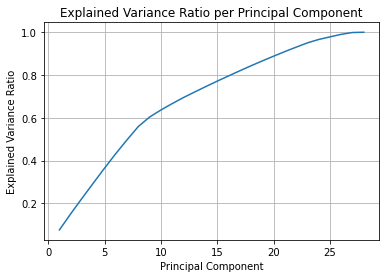

In [70]:
#Plot the explained variance ratios
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cum)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.grid()
plt.show()

In [71]:
X_train_pca = pca.transform(X_train_std)
X_val_pca = pca.transform(X_val_std)

In [72]:
X_train_pca.shape

(1108, 28)

In [73]:
# from sklearn.neighbors import KNeighborsClassifier

# start = perf_counter()
# model = KNeighborsClassifier()
# param_grid = {'n_neighbors':[2,3,4,5,6,7,8,9]}

# classifier = GridSearchCV(estimator = model, param_grid=param_grid, cv = 10, scoring='f1_macro', n_jobs=-1)
# classifier.fit(X_train_pca, y_train)
# end = perf_counter()
# print(f"Time taken for training kNN classifier {end-start:.2f} secs")

##### Random Forest classifer

In [74]:
start = perf_counter()
model = RandomForestClassifier()
param_grid = {'n_estimators': [20, 30, 50, 70, 90, 110, 130, 150, 200, 250, 300],
              'max_depth':[30,35, 50, 70, 100]}

classifier = GridSearchCV(estimator = model, param_grid=param_grid, cv = 10, scoring='f1_macro', n_jobs=-1)
classifier.fit(X_train_pca, y_train)
end = perf_counter()
print(f"Time taken for training RandomForestClassifier {end-start:.2f} secs")

Time taken for training RandomForestClassifier 258.61 secs


In [75]:
y_pred = classifier.predict(X_val_pca)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [76]:
from sklearn.metrics import f1_score
f2 = f1_score(y_val, y_pred,average='macro')
print(f2)

0.5088652482269503


In [77]:
classifier.best_params_

{'max_depth': 35, 'n_estimators': 20}

In [78]:
import pickle

In [79]:
with open ("model1.pkl",'wb') as f:
    pickle.dump(classifier,f)

In [83]:
# Save MinMaxScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(std, f)

# Save PCA
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)


In [49]:
with open('HCV-Egy-Data.csv', 'r') as file:
    headers = file.readline().strip().split(',')
    n_features = len(headers)
    n_samples = sum(1 for line in file)


In [50]:
n_samples

1385

In [51]:
n_features

29